# Using all features of the prepared files and default neural network  parameters 

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklift.models import ClassTransformation
from sklift import metrics
from sklift import viz
from sklearn.preprocessing import StandardScaler

In [2]:
clients = pd.read_csv('clients_train_modified.csv', index_col='client_id')
clients

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,6.425000,25.7,0.000,0.0,0.000000,0.0,0.000000,0.0,700.750000,2803.00,17383,17535,45.000000,0,0,0
000036f903,1.715625,54.9,1.875,60.0,0.000000,0.0,0.000000,0.0,306.406250,9805.00,17266,17279,72.000000,1,0,0
0001f552b0,5.260000,78.9,0.000,0.0,0.000000,0.0,0.000000,0.0,410.345333,6155.18,17347,17771,33.000000,1,0,0
00020e7b18,15.894444,286.1,0.000,0.0,-32.888889,-592.0,-1.666667,-30.0,1434.422778,25819.61,17497,17541,73.000000,0,0,0
000220a0a7,6.940000,104.1,0.000,0.0,0.000000,0.0,0.000000,0.0,573.771333,8606.57,17509,17808,46.379533,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,1.950000,35.1,0.000,0.0,0.000000,0.0,0.000000,0.0,318.423889,5731.63,17343,17797,47.000000,0,1,0
fffd63dfe3,1.625000,6.5,0.000,0.0,0.000000,0.0,0.000000,0.0,335.127500,1340.51,17312,17578,31.000000,0,0,0
fffd8c9d7d,2.200000,11.0,0.000,0.0,0.000000,0.0,0.000000,0.0,327.306000,1636.53,17582,17712,48.000000,1,0,0


In [3]:
x_cols = clients.columns

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(clients)

StandardScaler()

In [6]:
clients_scaled = pd.DataFrame(scaler.transform(clients),
                              columns=x_cols,
                             index=clients.index)
clients_scaled

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,0.326493,-0.544865,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.547587,-0.653612,-0.771133,-0.856385,-0.087757,-0.763412,-0.449111,-0.311067
000036f903,-0.597875,-0.239623,3.369176,7.499476,0.433102,0.563999,0.246932,0.395964,-0.504430,0.138021,-1.344979,-1.862848,1.615961,1.309908,-0.449111,-0.311067
0001f552b0,0.097824,0.011260,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.227145,-0.274621,-0.947701,0.071448,-0.844965,1.309908,-0.449111,-0.311067
00020e7b18,2.185181,2.177224,-0.072084,-0.102507,-3.206022,-4.001476,-0.403913,-1.443925,2.504855,1.948604,-0.212002,-0.832796,1.679061,-0.763412,-0.449111,-0.311067
000220a0a7,0.427579,0.274688,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.208837,0.002529,-0.153146,0.216913,-0.000708,-0.763412,2.226620,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,-0.551871,-0.446602,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.472370,-0.322507,-0.967320,0.173667,0.038444,-0.763412,2.226620,-0.311067
fffd63dfe3,-0.615663,-0.745572,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.427809,-0.818959,-1.119365,-0.687331,-0.971167,-0.763412,-0.449111,-0.311067
fffd8c9d7d,-0.502801,-0.698532,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.448675,-0.785491,0.204895,-0.160510,0.101545,1.309908,-0.449111,-0.311067


In [7]:
df_full = pd.read_csv('train.csv', index_col='client_id')\
    .join(clients_scaled, how='left')
df_full

,treatment_flg,purchased,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,,,
ad6561e2d8,1,1,-0.457165,0.203605,-0.072084,-0.102507,0.256063,0.070434,0.246932,0.395964,-0.601460,0.250673,-0.182574,-0.309907,0.227746,1.309908,-0.449111,-0.311067
7c1ccbf93f,1,1,-0.012094,-0.715257,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.186716,-0.874302,-0.295381,-0.663742,-1.412871,1.309908,-0.449111,-0.311067
b58fadcab6,1,1,-0.390384,0.142974,-0.072084,-0.102507,-0.602976,-1.818994,0.246932,0.395964,-0.176185,0.631720,-0.334618,0.142215,-0.655663,-0.763412,-0.449111,-0.311067
e99e6fabb9,0,0,-0.729281,-0.671353,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.732479,-0.645811,0.621791,-0.282386,2.057665,1.309908,-0.449111,-0.311067
27fb6f8520,1,1,-0.396808,0.045757,1.151475,2.431487,0.418348,0.533151,-0.403913,-2.670518,-0.442714,0.147202,-0.864322,-0.935015,-0.781865,1.309908,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,1,1,0.758315,-0.452875,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.664302,-0.633827,1.445775,0.940309,1.615961,-0.763412,-0.449111,-0.311067
f634deea4e,0,1,-0.721304,-0.211399,-0.072084,-0.102507,0.238944,-0.153212,0.246932,0.395964,-0.790863,0.222140,0.126420,-0.592975,-0.718764,-0.763412,-0.449111,-0.311067
16cb4f99b0,0,1,-0.250437,-0.558455,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.125167,-0.615512,0.219609,1.156541,0.227746,1.309908,-0.449111,-0.311067


In [8]:
indices_train, indices_val = train_test_split(df_full.index, 
                                              test_size=0.2, 
                                              random_state=8)

In [9]:
indices_train.shape

(112021,)

In [10]:
indices_val.shape

(28006,)

In [11]:
X_train = df_full.loc[indices_train, x_cols]
X_train

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
fd1ab717e8,-0.344139,0.318593,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.674769,0.016709,1.146590,0.881336,1.426659,1.309908,-0.449111,-0.311067
5be3f83065,1.015586,0.640561,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.588284,0.162789,1.852862,1.113294,1.300457,1.309908,-0.449111,-0.311067
1c48fc99b2,-0.516362,0.411629,-0.072084,-0.102507,0.189674,-0.369147,0.246932,0.395964,-0.434654,1.097419,-1.085032,-1.548328,0.732551,1.309908,-0.449111,-0.311067
fcce9d3197,-0.494128,0.195242,-0.072084,-0.102507,0.026531,-0.654489,0.246932,0.395964,-0.421486,0.670231,-0.834894,-1.438246,-0.213959,-0.763412,-0.449111,-0.311067
4f43f48cb7,0.950368,2.097777,-0.072084,-0.102507,-1.280050,-2.898667,0.246932,0.395964,0.928971,1.795747,-0.761324,0.350584,-0.277059,-0.763412,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5792264c8,-0.157904,0.055165,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.004736,0.201673,-0.570042,-0.805275,1.237357,-0.763412,-0.449111,-0.311067
84880145bd,0.233598,0.990752,-0.072084,-0.102507,-0.169745,-0.654489,0.246932,0.395964,-0.053363,0.588458,1.740055,0.692624,-0.718764,-0.763412,2.226620,-0.311067
49eb365a88,-0.179916,-0.009647,-0.072084,-0.102507,-0.479753,-0.708473,0.246932,0.395964,-0.210638,-0.028665,-1.065413,-0.734508,-1.665274,-0.763412,2.226620,-0.311067


In [12]:
treat_train = df_full.loc[indices_train, 'treatment_flg']
treat_train

client_id
fd1ab717e8    1
5be3f83065    1
1c48fc99b2    0
fcce9d3197    1
4f43f48cb7    0
             ..
c5792264c8    0
84880145bd    0
49eb365a88    0
1b55a9f080    1
9961481e46    1
Name: treatment_flg, Length: 112021, dtype: int64

In [13]:
y_train = df_full.loc[indices_train, 'purchased']
y_train

client_id
fd1ab717e8    1
5be3f83065    0
1c48fc99b2    1
fcce9d3197    1
4f43f48cb7    1
             ..
c5792264c8    1
84880145bd    1
49eb365a88    0
1b55a9f080    0
9961481e46    1
Name: purchased, Length: 112021, dtype: int64

In [14]:
X_val = df_full.loc[indices_val, x_cols]
X_val

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
c0582c1d5e,-0.632076,-0.346249,-0.072084,-0.102507,-0.081989,-0.477114,0.246932,0.395964,-0.650816,-0.145813,0.146039,-0.018976,0.606350,-0.763412,-0.449111,-0.311067
9a96a00f1d,3.342703,4.653655,-0.072084,-0.102507,-1.166699,-2.112048,0.246932,0.395964,4.101678,4.545778,-0.839799,-1.064754,1.111155,1.309908,-0.449111,-0.311067
55bca71943,1.087089,-0.490507,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,1.695660,-0.586874,0.494270,1.836689,-0.908066,-0.763412,-0.449111,3.214739
5bb5a27171,-0.332497,0.276779,-0.072084,-0.102507,-0.689661,-2.096624,0.246932,0.395964,-0.494773,0.221219,-0.918273,-1.284918,-0.340160,1.309908,-0.449111,-0.311067
d9c7b97fba,-0.322875,-0.031599,-0.072084,-0.102507,-0.203130,-0.500250,0.246932,0.395964,-0.202260,0.168226,-1.065413,0.708350,-0.277059,-0.763412,2.226620,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f68c84f07b,-0.460273,-0.358793,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.239603,-0.144946,1.504631,1.836689,-1.728375,-0.763412,2.226620,3.214739
704cff2628,-0.720892,-0.711076,-0.072084,-0.102507,0.383924,0.533151,-1.054759,-1.443925,-0.743242,-0.749825,-0.055052,-0.431783,-0.277059,-0.763412,-0.449111,-0.311067
feff930002,-0.559068,-0.213490,-0.072084,-0.102507,-0.145962,-0.646777,0.246932,0.395964,-0.497624,0.077391,-0.829989,-0.667673,-1.097368,1.309908,-0.449111,-0.311067


In [15]:
treat_val = df_full.loc[indices_val, 'treatment_flg']
treat_val

client_id
c0582c1d5e    1
9a96a00f1d    0
55bca71943    0
5bb5a27171    0
d9c7b97fba    0
             ..
f68c84f07b    0
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: treatment_flg, Length: 28006, dtype: int64

In [16]:
y_val = df_full.loc[indices_val, 'purchased']
y_val

client_id
c0582c1d5e    1
9a96a00f1d    1
55bca71943    0
5bb5a27171    1
d9c7b97fba    0
             ..
f68c84f07b    1
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: purchased, Length: 28006, dtype: int64

# Model

In [17]:
model = ClassTransformation(KNeighborsClassifier())

In [18]:
%%time
model = model.fit(X_train, y_train, treat_train)

CPU times: user 18 ms, sys: 0 ns, total: 18 ms
Wall time: 16.7 ms


# Results for the train set

In [19]:
y_pred_train = model.predict(X_train)
y_pred_train

array([ 0.2, -0.6, -0.6, ..., -0.2, -1. ,  0.2])

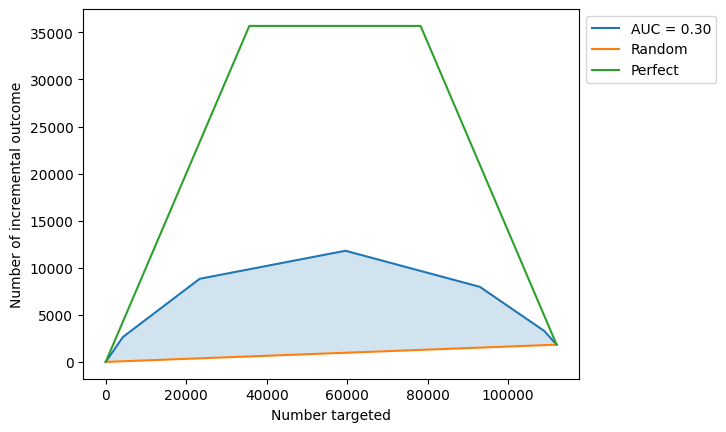

In [20]:
viz.plot_qini_curve(y_train, y_pred_train, treat_train);

In [21]:
metrics.qini_auc_score(y_train, y_pred_train, treat_train)

0.3031494276728063

# Results for the validation set

In [22]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.6,  0.6, -0.2, ..., -0.6, -0.2,  0.2])

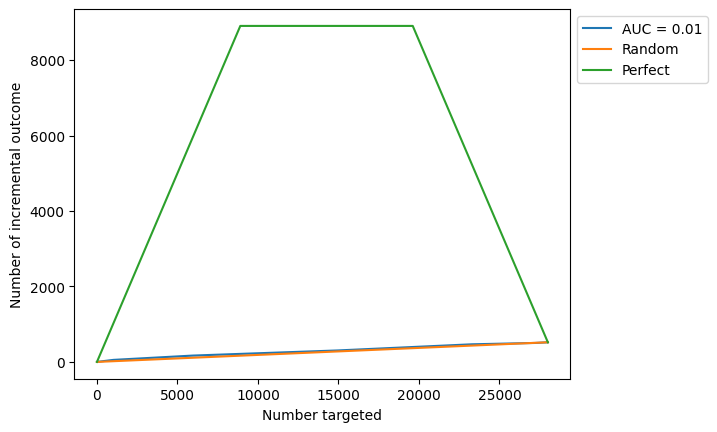

In [23]:
viz.plot_qini_curve(y_val, y_pred_val, treat_val);

In [24]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.005600588989027707